### Problem Statement : 
----
### Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

----
### Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

### Import Data

In [2]:
fraud_data = pd.read_csv("Fraud_check.csv")
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
fraud_data.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


### Data Understanding

In [5]:
fraud_data.shape

(600, 6)

In [6]:
fraud_data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
fraud_data.describe(include = 'all')

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600,600,600.000000,600.000000,600.000000,600
unique,2,3,NaN,NaN,NaN,2
top,YES,Single,NaN,NaN,NaN,YES
freq,312,217,NaN,NaN,NaN,302
mean,NaN,NaN,55208.375000,108747.368333,15.558333,NaN
std,NaN,NaN,26204.827597,49850.075134,8.842147,NaN
min,NaN,NaN,10003.000000,25779.000000,0.000000,NaN
25%,NaN,NaN,32871.500000,66966.750000,8.000000,NaN
50%,NaN,NaN,55074.500000,106493.500000,15.000000,NaN
75%,NaN,NaN,78611.750000,150114.250000,24.000000,NaN


In [8]:
fraud_data.nunique()

Undergrad            2
Marital.Status       3
Taxable.Income     599
City.Population    598
Work.Experience     31
Urban                2
dtype: int64

In [9]:
fraud_data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

### Understanding the target variable 

In [10]:
fraud_data['Taxable.Income'].nunique()

599

In [11]:
fraud_data['Taxable.Income'].unique()

array([68833, 33700, 36925, 50190, 81002, 33329, 83357, 62774, 83519,
       98152, 29732, 61063, 11794, 61830, 64070, 69869, 24987, 39476,
       97957, 10987, 88636, 14310, 78969, 92040, 38239, 31417, 55299,
       87778, 10379, 94033, 73854, 64007, 97200, 82071, 12514, 31336,
       10163, 68513, 14912, 74010, 50777, 49436, 96485, 70339, 33614,
       81079, 31532, 44034, 16264, 45706, 79616, 40137, 97703, 21917,
       81939, 19925, 34703, 78573, 10870, 65065, 94418, 26972, 91684,
       51685, 62158, 58312, 42507, 61486, 10150, 99619, 89302, 94287,
       41344, 41382, 32434, 61105, 67628, 31458, 73411, 10329, 44947,
       35610, 66564, 87348, 69098, 28449, 39277, 13747, 86652, 26741,
       77634, 99325, 85651, 15296, 10348, 41395, 22258, 79583, 22187,
       52495, 93078, 35072, 32662, 89250, 41641, 55873, 19169, 46629,
       51927, 69224, 24557, 77762, 96355, 90910, 21945, 79357, 42784,
       54638, 29944, 97318, 52022, 20391, 21016, 26679, 70682, 87326,
       15853, 75501,

### Data Manipulation

In [12]:
fraud_data=fraud_data.rename({'Taxable.Income':'Tax_Income','Marital.Status':'Marital_Status','Work.Experience':'Work_Exp','City.Population':'Population'},axis=1)

In [13]:
fraud_data.head()

,Undergrad,Marital_Status,Tax_Income,Population,Work_Exp,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [14]:
encoder = LabelEncoder()

In [15]:
fraud_data['Undergrad'] = encoder.fit_transform(fraud_data['Undergrad'])
fraud_data['Marital_Status'] = encoder.fit_transform(fraud_data['Marital_Status'])
fraud_data['Urban'] = encoder.fit_transform(fraud_data['Urban'])
fraud_data

,Undergrad,Marital_Status,Tax_Income,Population,Work_Exp,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


### Correlation of the features 

In [16]:
corr = fraud_data.corr()
corr

,Undergrad,Marital_Status,Tax_Income,Population,Work_Exp,Urban
Undergrad,1.000000,0.042407,-0.049232,0.079579,-0.005362,-0.000267
Marital_Status,0.042407,1.000000,-0.012944,-0.001564,-0.002213,0.064562
Tax_Income,-0.049232,-0.012944,1.000000,-0.064387,-0.001818,0.070628
Population,0.079579,-0.001564,-0.064387,1.000000,0.013135,-0.040098
Work_Exp,-0.005362,-0.002213,-0.001818,0.013135,1.000000,-0.094559
Urban,-0.000267,0.064562,0.070628,-0.040098,-0.094559,1.000000


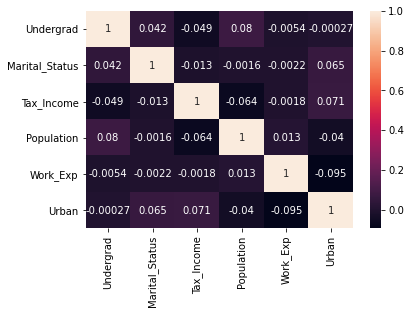

In [17]:
sns.heatmap(corr,annot=True)
plt.show()

In [18]:
print('skewness of the dataset:\n','\n',fraud_data.skew())
print('--------------------------------------------------------')
print('kurtosis values of the dataset:\n','\n',fraud_data.kurtosis())

skewness of the dataset:
 
 Undergrad        -0.080265
Marital_Status   -0.086622
Tax_Income        0.030015
Population        0.125009
Work_Exp          0.018529
Urban            -0.013367
dtype: float64
--------------------------------------------------------
kurtosis values of the dataset:
 
 Undergrad        -2.000236
Marital_Status   -1.514965
Tax_Income       -1.199782
Population       -1.120154
Work_Exp         -1.167524
Urban            -2.006521
dtype: float64


Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


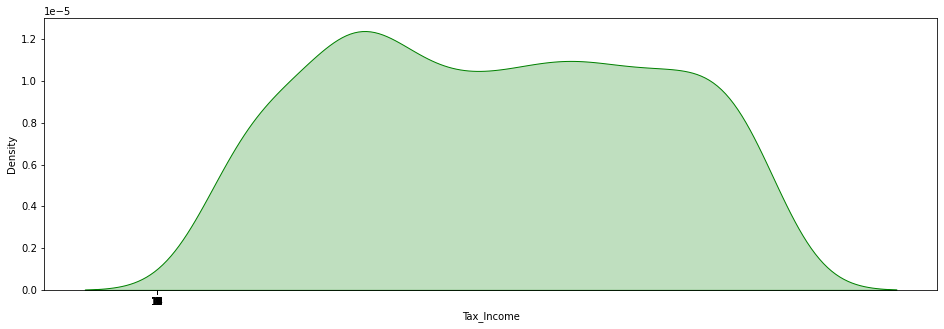

In [19]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(fraud_data['Tax_Income'].skew()))
print("Kurtosis: {}".format(fraud_data['Tax_Income'].kurtosis()))
ax = sns.kdeplot(fraud_data['Tax_Income'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

### The data is Skewed on the right
### The data has negative Kurtosis

-----
### Since the target variable is continious, we create a class of the value based on the tax_value <= 30000 as "Risky" and others are "Good"


In [20]:
fraud_data['Tax_Income']=pd.cut(fraud_data['Tax_Income'],bins=[0,30000,100000],labels=['risky','good'])

In [21]:
fraud_data

,Undergrad,Marital_Status,Tax_Income,Population,Work_Exp,Urban
0,0,2,good,50047,10,1
1,1,0,good,134075,18,1
2,0,1,good,160205,30,1
3,1,2,good,193264,15,1
4,0,1,good,27533,28,0
...,...,...,...,...,...,...
595,1,0,good,39492,7,1
596,1,0,good,55369,2,1
597,0,0,good,154058,0,1
598,1,1,good,180083,17,0


### Uderstanding the new target variable after converting the numerical data of target variable into categorical data

In [22]:
fraud_data['Tax_Income'].unique()

['good', 'risky']
Categories (2, object): ['risky' < 'good']

In [23]:
fraud_data['Tax_Income'].value_counts()

good     476
risky    124
Name: Tax_Income, dtype: int64

In [24]:
fraud_data['Tax_Income'].count()

600

---
### Model Building

In [25]:
X = fraud_data.drop(['Tax_Income'],axis=1)
y = fraud_data[['Tax_Income']]

In [26]:
X.shape , y.shape

((600, 5), (600, 1))

In [27]:
X.head()

,Undergrad,Marital_Status,Population,Work_Exp,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0


In [28]:
y.head()

,Tax_Income
0,good
1,good
2,good
3,good
4,good


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=12121,stratify=y)

In [30]:
X_train.shape,y_train.shape

((480, 5), (480, 1))

In [31]:
X_test.shape,y_test.shape

((120, 5), (120, 1))

### Model Training 

In [32]:
rf_model =RandomForestClassifier(n_jobs=4,n_estimators =150, oob_score =True,criterion ='entropy',random_state=42) 
rf_model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150, n_jobs=4,
                       oob_score=True, random_state=42)

In [33]:
print('OOB Score:', rf_model.oob_score_)

OOB Score: 0.7395833333333334


### Model Testing
---
### Training Data

In [34]:
y_pred_train = rf_model.predict(X_train)
pd.Series(y_pred_train).value_counts()

good     381
risky     99
dtype: int64

In [35]:
y_pred_train

array(['good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'risky', 'good', 'good', 'risky', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good',
       'good', 'good', 'good', 'good', 'risky', 'good', 'risky', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky',
       'good', 'good', 'risky', 'good', 'risky', 'good', 'risky', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'good',
       'risky', 'good', 'good', 'good', 'good', 'risky', 'good', 'good',
       'risky', 'good', 'risky', 'good', 'good', 'good', 'good', 'good',
       'risky', 'good', 'good', 'good', 'good', 'good', 'risky', 'risky',
       'good', 'good', 'good', 'good', 'risky', 'good', 

### Model Evaluation 
---
### Training Data

In [36]:
print('Accuracy Score           :', accuracy_score(y_train , y_pred_train))
print('---------------------------')
print('Confusion Matrix         :\n', confusion_matrix(y_train , y_pred_train))
print('---------------------------')
print('Classification Report    :\n',classification_report(y_train , y_pred_train))

Accuracy Score           : 1.0
---------------------------
Confusion Matrix         :
 [[381   0]
 [  0  99]]
---------------------------
Classification Report    :
               precision    recall  f1-score   support

        good       1.00      1.00      1.00       381
       risky       1.00      1.00      1.00        99

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



### Model Testing 
----
### Testing Data

In [37]:
y_pred_test = rf_model.predict(X_test)
pd.Series(y_pred_test).value_counts()

good     119
risky      1
dtype: int64

In [38]:
y_pred_test

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
     

### Model Evaluation 
----
### Testing Data

In [39]:
print('Accuracy Score:', accuracy_score(y_test , y_pred_test))
print('---------------------------')
print('Confusion Matrix:\n', confusion_matrix(y_test , y_pred_test))
print('---------------------------')
print('Classification Report:\n',classification_report(y_test , y_pred_test))

Accuracy Score: 0.7833333333333333
---------------------------
Confusion Matrix:
 [[94  1]
 [25  0]]
---------------------------
Classification Report:
               precision    recall  f1-score   support

        good       0.79      0.99      0.88        95
       risky       0.00      0.00      0.00        25

    accuracy                           0.78       120
   macro avg       0.39      0.49      0.44       120
weighted avg       0.63      0.78      0.70       120



In [40]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X_train, y_train, cv=5)

In [41]:
scores.mean()

0.7541666666666668

### Automate the way for getting Optimal Values for Hyperparameter

In [42]:
pg = {'n_estimators': [150,200,350,500],
      'max_features': ['auto', 'sqrt', 'log2'],
      'max_depth' : [3,4,5,6,7,8],
      'criterion' :['gini', 'entropy']}

In [43]:
%%time
grid_search_cv = GridSearchCV(estimator=rf_model,param_grid= pg,cv=5)
grid_search_cv.fit(X_train,y_train)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 150}
0.79375
Wall time: 8min 58s


### Model Training

In [44]:
rforest_model = RandomForestClassifier(max_depth= 3, criterion='gini',max_features='auto',n_estimators =150,oob_score=True,random_state=42)
rforest_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=150, oob_score=True,
                       random_state=42)

### Model Testing
---
### Train Data

In [45]:
y_pred_train = rforest_model.predict(X_train)
pd.Series(y_pred_train).value_counts()

good    480
dtype: int64

In [46]:
rforest_model.oob_score_

0.79375

In [47]:
y_pred_train

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
      

### Model Evaluation 
---
### Train Data

In [48]:
print('Accuracy Score           :', accuracy_score(y_train , y_pred_train))
print('---------------------------')
print('Confusion Matrix         :\n', confusion_matrix(y_train , y_pred_train))
print('---------------------------')
print('Classification Report    :\n',classification_report(y_train , y_pred_train))

Accuracy Score           : 0.79375
---------------------------
Confusion Matrix         :
 [[381   0]
 [ 99   0]]
---------------------------
Classification Report    :
               precision    recall  f1-score   support

        good       0.79      1.00      0.89       381
       risky       0.00      0.00      0.00        99

    accuracy                           0.79       480
   macro avg       0.40      0.50      0.44       480
weighted avg       0.63      0.79      0.70       480



### Model Testing 
----
### Test Data

In [49]:
y_pred_test = rforest_model.predict(X_test)
pd.Series(y_pred_test).value_counts()

good    120
dtype: int64

In [50]:
y_pred_test

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
      

### Model Evaluation 
----
### Test Data

In [51]:
print('Accuracy Score:', accuracy_score(y_test , y_pred_test))
print('---------------------------')
print('Confusion Matrix:\n', confusion_matrix(y_test , y_pred_test))
print('---------------------------')
print('Classification Report:\n',classification_report(y_test , y_pred_test))

Accuracy Score: 0.7916666666666666
---------------------------
Confusion Matrix:
 [[95  0]
 [25  0]]
---------------------------
Classification Report:
               precision    recall  f1-score   support

        good       0.79      1.00      0.88        95
       risky       0.00      0.00      0.00        25

    accuracy                           0.79       120
   macro avg       0.40      0.50      0.44       120
weighted avg       0.63      0.79      0.70       120



In [52]:
scores = cross_val_score(rforest_model, X_train, y_train, cv=5)

In [53]:
scores.mean()

0.79375

### Gradient Boosting 

In [54]:
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [55]:
%%time
cv = GridSearchCV(gbc,parameters,cv=5)
cv.fit(X_train,y_train.values.ravel())

Wall time: 3min 50s


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]})

In [56]:
print(cv.best_params_)
print(cv.best_score_)

{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.79375


In [57]:
gb_model = GradientBoostingClassifier(learning_rate=0.01 ,n_estimators=5 , max_depth=1,random_state=42)
gb_model.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=5,
                           random_state=42)

### Model Testing
---
### Train Data

In [58]:
y_pred_train = gb_model.predict(X_train)
pd.Series(y_pred_train).value_counts()

good    480
dtype: int64

In [59]:
y_pred_train

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
      

### Model Evaluation 
---
### Train Data

In [60]:
print('Accuracy Score           :', accuracy_score(y_train , y_pred_train))
print('---------------------------')
print('Confusion Matrix         :\n', confusion_matrix(y_train , y_pred_train))
print('---------------------------')
print('Classification Report    :\n',classification_report(y_train , y_pred_train))

Accuracy Score           : 0.79375
---------------------------
Confusion Matrix         :
 [[381   0]
 [ 99   0]]
---------------------------
Classification Report    :
               precision    recall  f1-score   support

        good       0.79      1.00      0.89       381
       risky       0.00      0.00      0.00        99

    accuracy                           0.79       480
   macro avg       0.40      0.50      0.44       480
weighted avg       0.63      0.79      0.70       480



### Model Testing 
----
### Test Data

In [61]:
y_pred_test = gb_model.predict(X_test)
pd.Series(y_pred_test).value_counts()

good    120
dtype: int64

In [62]:
y_pred_test

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
      

### Model Evaluation 
----
### Test Data

In [63]:
print('Accuracy Score:', accuracy_score(y_test , y_pred_test))
print('---------------------------')
print('Confusion Matrix:\n', confusion_matrix(y_test , y_pred_test))
print('---------------------------')
print('Classification Report:\n',classification_report(y_test , y_pred_test))

Accuracy Score: 0.7916666666666666
---------------------------
Confusion Matrix:
 [[95  0]
 [25  0]]
---------------------------
Classification Report:
               precision    recall  f1-score   support

        good       0.79      1.00      0.88        95
       risky       0.00      0.00      0.00        25

    accuracy                           0.79       120
   macro avg       0.40      0.50      0.44       120
weighted avg       0.63      0.79      0.70       120



In [64]:
scores = cross_val_score(gb_model, X_train, y_train,cv=5)
scores.mean()

0.79375

### Conclusion : 79% of the people have a 'good' taxable income.
----
### Also the model gives 95 correct predictions and 25 false predictions out of 120 total predictions.
----

### Handling the imbalanced data

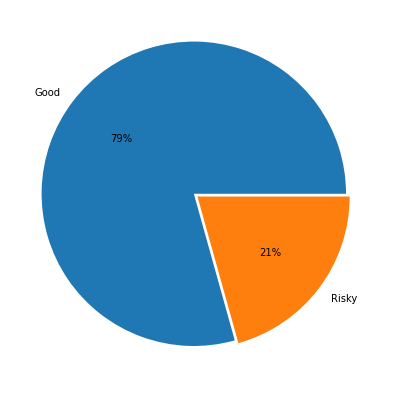

In [65]:
plt.figure(figsize=(8,7))
plt.pie(x = fraud_data['Tax_Income'].value_counts(),explode=[0.03,0], labels=['Good','Risky'],autopct='%1.0f%%')
plt.show()

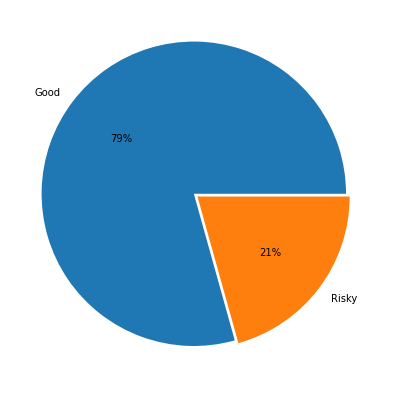

In [66]:
plt.figure(figsize=(8,7))
plt.pie(x = y.value_counts(),explode=[0.03,0], labels=['Good','Risky'],autopct='%1.0f%%')
plt.show()

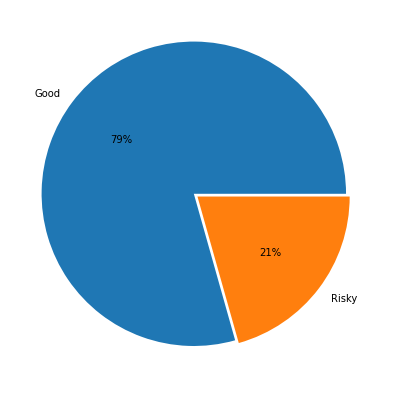

In [67]:
plt.figure(figsize=(8,7))
plt.pie(x = y_train.value_counts(),explode=[0.03,0], labels=['Good','Risky'],autopct='%1.0f%%')
plt.show()

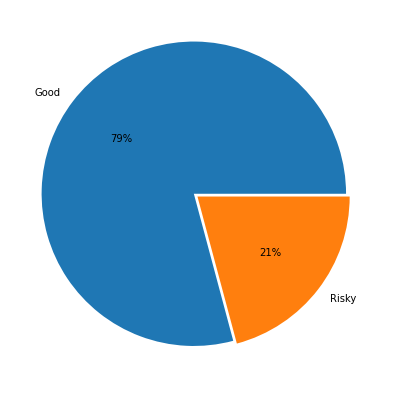

In [68]:
plt.figure(figsize=(8,7))
plt.pie(x = y_test.value_counts(),explode=[0.03,0], labels=['Good','Risky'],autopct='%1.0f%%')
plt.show()

In [69]:
fraud_data

,Undergrad,Marital_Status,Tax_Income,Population,Work_Exp,Urban
0,0,2,good,50047,10,1
1,1,0,good,134075,18,1
2,0,1,good,160205,30,1
3,1,2,good,193264,15,1
4,0,1,good,27533,28,0
...,...,...,...,...,...,...
595,1,0,good,39492,7,1
596,1,0,good,55369,2,1
597,0,0,good,154058,0,1
598,1,1,good,180083,17,0


In [70]:
fraud_data['Tax_Income'].value_counts()

good     476
risky    124
Name: Tax_Income, dtype: int64

In [71]:
rforest_model = RandomForestClassifier(max_depth= 3, criterion='gini',max_features='auto',n_estimators =150,oob_score=True,class_weight={'good':1,'risky':4.1},random_state=42)

In [72]:
%%time
rforest_model.fit(X_train,y_train)

Wall time: 927 ms


RandomForestClassifier(class_weight={'good': 1, 'risky': 4.1}, max_depth=3,
                       n_estimators=150, oob_score=True, random_state=42)

In [73]:
y_pred_train = rforest_model.predict(X_train)
pd.Series(y_pred_train).value_counts()

good     263
risky    217
dtype: int64

### Train Data Evaluation

In [74]:
print('Accuracy Score:', accuracy_score(y_train , y_pred_train))
print('---------------------------')
print('Confusion Matrix:\n', confusion_matrix(y_train , y_pred_train))
print('---------------------------')
print('Classification Report:\n',classification_report(y_train , y_pred_train))

Accuracy Score: 0.6375
---------------------------
Confusion Matrix:
 [[235 146]
 [ 28  71]]
---------------------------
Classification Report:
               precision    recall  f1-score   support

        good       0.89      0.62      0.73       381
       risky       0.33      0.72      0.45        99

    accuracy                           0.64       480
   macro avg       0.61      0.67      0.59       480
weighted avg       0.78      0.64      0.67       480



### Test Data Evaluation

In [75]:
y_pred_test = rforest_model.predict(X_test)
pd.Series(y_pred_test).value_counts()

good     74
risky    46
dtype: int64

In [76]:
print('Accuracy Score:', accuracy_score(y_test , y_pred_test))
print('---------------------------')
print('Confusion Matrix:\n', confusion_matrix(y_test , y_pred_test))
print('---------------------------')
print('Classification Report:\n',classification_report(y_test , y_pred_test))

Accuracy Score: 0.525
---------------------------
Confusion Matrix:
 [[56 39]
 [18  7]]
---------------------------
Classification Report:
               precision    recall  f1-score   support

        good       0.76      0.59      0.66        95
       risky       0.15      0.28      0.20        25

    accuracy                           0.53       120
   macro avg       0.45      0.43      0.43       120
weighted avg       0.63      0.52      0.57       120



### ====================================================================================

## Data Preprocessing 

In [77]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
minmax_scaler = minmax_scaler.fit_transform(X)
X_scaled = pd.DataFrame(data = minmax_scaler,columns=X.columns)
X_scaled

,Undergrad,Marital_Status,Population,Work_Exp,Urban
0,0.0,1.0,0.139472,0.333333,1.0
1,1.0,0.0,0.622394,0.600000,1.0
2,0.0,0.5,0.772568,1.000000,1.0
3,1.0,1.0,0.962563,0.500000,1.0
4,0.0,0.5,0.010081,0.933333,0.0
...,...,...,...,...,...
595,1.0,0.0,0.078811,0.233333,1.0
596,1.0,0.0,0.170058,0.066667,1.0
597,0.0,0.0,0.737240,0.000000,1.0
598,1.0,0.5,0.886810,0.566667,0.0


In [78]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.20,random_state=12,stratify=y)

In [79]:
rforest_model = RandomForestClassifier(max_depth=9, criterion='gini',max_features='auto',n_estimators =150,oob_score=True,class_weight={'good':0.8,'risky':3.3},random_state=42)
rforest_model.fit(X_train,y_train)

RandomForestClassifier(class_weight={'good': 0.8, 'risky': 3.3}, max_depth=9,
                       n_estimators=150, oob_score=True, random_state=42)

In [80]:
%%time
rforest_model.fit(X_train,y_train)

Wall time: 775 ms


RandomForestClassifier(class_weight={'good': 0.8, 'risky': 3.3}, max_depth=9,
                       n_estimators=150, oob_score=True, random_state=42)

In [81]:
y_pred_train = rforest_model.predict(X_train)
pd.Series(y_pred_train).value_counts()

good     376
risky    104
dtype: int64

### Train Data Evaluation

In [82]:
print('Accuracy Score:', accuracy_score(y_train , y_pred_train))
print('---------------------------')
print('Confusion Matrix:\n', confusion_matrix(y_train , y_pred_train))
print('---------------------------')
print('Classification Report:\n',classification_report(y_train , y_pred_train))

Accuracy Score: 0.9895833333333334
---------------------------
Confusion Matrix:
 [[376   5]
 [  0  99]]
---------------------------
Classification Report:
               precision    recall  f1-score   support

        good       1.00      0.99      0.99       381
       risky       0.95      1.00      0.98        99

    accuracy                           0.99       480
   macro avg       0.98      0.99      0.98       480
weighted avg       0.99      0.99      0.99       480



### Test Data Evaluation

In [83]:
y_pred_test = rforest_model.predict(X_test)
pd.Series(y_pred_test).value_counts()

good     112
risky      8
dtype: int64

In [84]:
print('Accuracy Score:', accuracy_score(y_test , y_pred_test))
print('---------------------------')
print('Confusion Matrix:\n', confusion_matrix(y_test , y_pred_test))
print('---------------------------')
print('Classification Report:\n',classification_report(y_test , y_pred_test))

Accuracy Score: 0.725
---------------------------
Confusion Matrix:
 [[87  8]
 [25  0]]
---------------------------
Classification Report:
               precision    recall  f1-score   support

        good       0.78      0.92      0.84        95
       risky       0.00      0.00      0.00        25

    accuracy                           0.73       120
   macro avg       0.39      0.46      0.42       120
weighted avg       0.61      0.72      0.67       120



### Conclusion : After preprocessing the data and making the imbalanced data into balanced data, we got an accuracy of 72.5%.

### So, 72.5% of the people are having 'good' taxable income.

### The above confusion matrix tell us that 87 correct predictions were made out of 120 and 33 incorrect predictions were made out if 120.

### Feature Importance 

In [85]:
rforest_model.feature_importances_

array([0.04137732, 0.07425662, 0.48823914, 0.34539619, 0.05073072])

In [86]:
feature_imp = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': rforest_model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [87]:
feature_imp

,feature,importance
2,Population,0.488239
3,Work_Exp,0.345396
1,Marital_Status,0.074257
4,Urban,0.050731
0,Undergrad,0.041377


### As seen in the above table, Population is most important feature in the dataset.